## Background

Wisconsin Diagnostic breast cancer dataset (toy dataset provided by Scikit-Learn) 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

They describe characteristics of the cell nuclei present in the image.

## Project Objectives

To conduct data processing and transformation 

To prepare the data ready for modeling, build and evaluate several classification models

To demonstrate the application of the Voting and Stacking Ensemble methods on this Cancer dataset

To document the analysis, comparison and findings

## Problem Statement

To predict whether the tumour is benign or malignant

## Metadata

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. 

In [1]:
# import the pacakges
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.model_selection import (
    RepeatedStratifiedKFold, 
    cross_validate )
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    precision_recall_curve, 
    classification_report, 
    confusion_matrix )


# Data Preparation

In [2]:
# load the toy dataset from sklearn

from sklearn.datasets import load_breast_cancer

df_bc = load_breast_cancer() 
df_bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
# The `DESCR` property gives a detailed description about the dataset

df_bc.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [4]:
# Keys give a view of other properties available

df_bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# Feature_names list down all the features in this dataset

df_bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# The number of features in this dataset

len(df_bc.feature_names)

30

In [7]:
# The target labels

df_bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# Data is stored in the "data" key

df_bc.data.shape

(569, 30)

The target column is stored with the `target` key

In [9]:
# Target Column is stored in the "target" key

df_bc.target.shape

(569,)

In [10]:
# Combine the data and target into a dataframe, and name the target column as "malignant"

data = np.c_[df_bc.data, df_bc.target]
column_names = np.append(df_bc.feature_names, ['malignant'])
df = pd.DataFrame(data, columns=column_names)

In [11]:
df.shape

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
#there are only 0 and 1 in the malignant column

df['malignant'].unique()

array([0., 1.])

From the `DESCR` (Class Distribution: 212 - Malignant, 357 - Benign)

'Malignant' is currently coded as 0.0, and 'Benign' as 1.0

In [16]:
df['malignant'].value_counts()

1.0    357
0.0    212
Name: malignant, dtype: int64

But it is better to recode 'Malignant' to 1 (positive class) and 'Benign' to 0

In [17]:
def conversion(score):
    """converts the respective score"""
    if score == 0.0:
        return 1
    elif score == 1.0:
        return 0

In [18]:
df['malignant'] = df.apply(lambda x: conversion(x['malignant']), axis=1)

In [19]:
df['malignant'].value_counts()

0    357
1    212
Name: malignant, dtype: int64

In [20]:
df['malignant'].value_counts()
df['malignant'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: malignant, dtype: float64

As the dataset is slightly skewed, the stratified train/test split method is used to divide the dataset into the training and test sets

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in df.columns if x != 'malignant']

# Create the generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['malignant']))

# Create the training and test sets
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'malignant']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'malignant']

As some of the Classifiers (is. k-NN, SVM) are sensitive to feature scale/transformations, need to perform scaling for the dataset

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Transform the returned NumPy arrays to dataframes

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
print(y_train.value_counts())
y_train.value_counts(normalize=True)

0    285
1    170
Name: malignant, dtype: int64


0    0.626374
1    0.373626
Name: malignant, dtype: float64

In [25]:
print(y_test.value_counts())
y_test.value_counts(normalize=True)

0    72
1    42
Name: malignant, dtype: int64


0    0.631579
1    0.368421
Name: malignant, dtype: float64

In [26]:
# define a function to summarize errors for later call
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

# Modelling and optimising the best performing classifiers
Once all the variables have been scaled, the classifier models can be built. To evaluate the model, the three indicators: Precision, Recall and F1 scores are used. The higher the Precision, Recall and F1 scores, the better the model performance. 

# 1. DecisionTree Classifier Model

Create an DecisionTree classifier Model and fit it using grid search <br> 
Try a range of number of depth and features <br>

In [27]:
#search for best layers of the Decision Tree using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    dt_clf = DecisionTreeClassifier(random_state=42)
    
    dt_clf.fit(X_train, y_train)
    
    #create an serach and evaluation ranges for depth and features
    param_grid = {'max_depth': range(1, dt_clf.tree_.max_depth+1, 2),
                  'max_features': range(1, len(X_train.columns)+1)}
    
    gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         n_jobs=-1)
    
    gr_dt_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(gr_dt_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9309505738668953

k-folds=3
0.9235907751835729

k-folds=4
0.9312217106471734

k-folds=5
0.9134158926728586

k-folds=6
0.9102154790291026

k-folds=7
0.92210162601626

k-folds=8
0.9227521816807531

k-folds=9
0.9453247814877694

k-folds=10
0.9077694871051868



In [28]:
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

param_grid = {'max_depth': range(1, dt_clf.tree_.max_depth+1, 2),
                  'max_features': range(1, len(X_train.columns)+1)}
    
gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         n_jobs=-1)

gr_dt_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(gr_dt_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with DecisionTree = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with DecisionTree = 0.9453247814877694


In [29]:
gr_dt_clf.best_estimator_.tree_.node_count, gr_dt_clf.best_estimator_.tree_.max_depth

(25, 5)

In [30]:
gr_dt_clf.best_params_

{'max_depth': 5, 'max_features': 22}

In [31]:
# The error on the training and test data sets
y_train_pred = gr_dt_clf.best_estimator_.predict(X_train)
y_test_pred = gr_dt_clf.best_estimator_.predict(X_test)

train_test_full_error_gr_dt_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_gr_dt_clf

,train,test
accuracy,0.989011,0.850877
precision,1.000000,0.857143
recall,0.970588,0.714286
f1,0.985075,0.779221


In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[67  5]
 [12 30]]


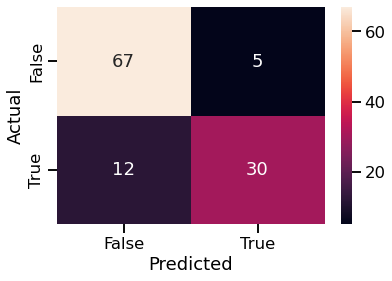

In [33]:
# Take a look at the confusion matrix on the test set prediction results
cm_gr_dt_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_gr_dt_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        72
           1       0.86      0.71      0.78        42

    accuracy                           0.85       114
   macro avg       0.85      0.82      0.83       114
weighted avg       0.85      0.85      0.85       114



### Adding Class_weight = 'balanced' 

In [35]:
# evaluate the model using a given test condition
def evaluate_model(cv):
    dt_bal_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    
    dt_bal_clf.fit(X_train, y_train)
    
    #create an serach and evaluation ranges for depth and features
    param_grid = {'max_depth': range(1, dt_bal_clf.tree_.max_depth+1, 2),
                  'max_features': range(1, len(X_train.columns)+1)}
    
    gr_dt_bal_clf = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         n_jobs=-1)
    
    gr_dt_bal_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(gr_dt_bal_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9150847909340039

k-folds=3
0.932600690322297

k-folds=4
0.9301635610389296

k-folds=5
0.927141382868937

k-folds=6
0.9505667790471533

k-folds=7
0.9597868757259002

k-folds=8
0.9376896086717514

k-folds=9
0.9407431315370265

k-folds=10
0.9389742103738046



In [36]:
dt_bal_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt_bal_clf.fit(X_train, y_train)

param_grid = {'max_depth': range(1, dt_bal_clf.tree_.max_depth+1, 2),
                  'max_features': range(1, len(X_train.columns)+1)}
    
gr_dt_bal_clf = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                         param_grid=param_grid, 
                         scoring = 'roc_auc',
                         n_jobs=-1)

gr_dt_bal_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(gr_dt_bal_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with DecisionTree (balanced) = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with DecisionTree (balanced) = 0.9597868757259002


In [37]:
gr_dt_bal_clf.best_estimator_.tree_.node_count, gr_dt_bal_clf.best_estimator_.tree_.max_depth

(15, 3)

In [38]:
gr_dt_bal_clf.best_params_

{'max_depth': 3, 'max_features': 3}

In [39]:
# Get the performance metrics of the best-performing tree
y_train_pred = gr_dt_bal_clf.best_estimator_.predict(X_train)
y_test_pred = gr_dt_bal_clf.best_estimator_.predict(X_test)

train_test_error_gr_dt_bal_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_error_gr_dt_bal_clf

,train,test
accuracy,0.958242,0.903509
precision,0.931429,0.878049
recall,0.958824,0.857143
f1,0.944928,0.867470


In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[67  5]
 [ 6 36]]


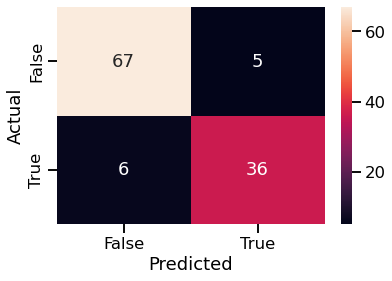

In [41]:
# Take a look at the confusion matrix on the test set prediction results
cm_gr_dt_bal_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_gr_dt_bal_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [42]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       285
           1       0.93      0.96      0.94       170

    accuracy                           0.96       455
   macro avg       0.95      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



# 2. KNeighbors Classifier Model

Create a KNeighbors classifier Model and fit it using grid search <br> 
Try a range of number of n neighbors <br>

In [104]:
from sklearn.neighbors import KNeighborsClassifier

# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    knn_clf = KNeighborsClassifier()
    
    param_grid = {"n_neighbors": np.arange(1,50)}
    
    gr_knn_clf = GridSearchCV(estimator = knn_clf, param_grid = param_grid, 
                          n_jobs = -1, scoring = 'roc_auc')
    
    gr_knn_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(gr_knn_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.987316411840024

k-folds=3
0.9892648287385128

k-folds=4
0.9869284613798206

k-folds=5
0.9898864809081527

k-folds=6
0.9893123900942133

k-folds=7
0.9909012775842044

k-folds=8
0.9908760221260222

k-folds=9
0.9917262073193738

k-folds=10
0.990596928426543



In [105]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1,50)}

gr_knn_clf = GridSearchCV(estimator = knn_clf, param_grid = param_grid, 
                          n_jobs = -1, scoring = 'roc_auc')

gr_knn_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(gr_knn_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with k-NN = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with k-NN = 0.9917262073193738


In [45]:
gr_knn_clf.best_params_

{'n_neighbors': 41}

In [46]:
gr_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=41)

In [47]:
# The error on the training and test data sets
y_train_pred = gr_knn_clf.predict(X_train)
y_test_pred = gr_knn_clf.predict(X_test)

train_test_full_error_gr_knn_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_gr_knn_clf

,train,test
accuracy,0.953846,0.947368
precision,1.000000,1.000000
recall,0.876471,0.857143
f1,0.934169,0.923077


In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[72  0]
 [ 6 36]]


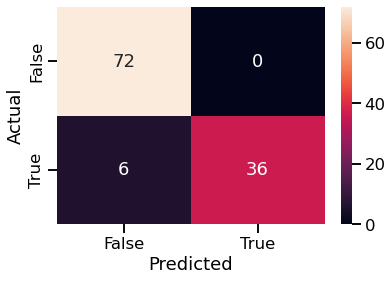

In [49]:
# Take a look at the confusion matrix on the test set prediction results
cm_gr_knn_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_gr_knn_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [50]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       285
           1       1.00      0.88      0.93       170

    accuracy                           0.95       455
   macro avg       0.97      0.94      0.95       455
weighted avg       0.96      0.95      0.95       455



# 3. SupportVectorMachine (SVM) Classifier Model

Create a SVM classifier Model and fit it using grid search <br> 
Try a range of number of kernel and C values <br>

In [51]:
from sklearn import svm
from sklearn.svm import SVC

# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    svc_clf = svm.SVC(random_state=1)
    
    #need to figure out hyperparameters for a model
    param_grid = {
        #key must match hyperparameter names of model
        'kernel': ('linear', 'poly', 'rbf'),
        'C': [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10]}

    gr_svc_clf = GridSearchCV(estimator = svc_clf, param_grid = param_grid, n_jobs = -1, scoring = 'roc_auc')
    
    gr_svc_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(gr_svc_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9923192797260734

k-folds=3
0.9931605329112254

k-folds=4
0.9942647920251916

k-folds=5
0.9943240454076367

k-folds=6
0.9930296257962711

k-folds=7
0.9929140534262484

k-folds=8
0.9945737133237134

k-folds=9
0.9945882852292021

k-folds=10
0.9949869603013617



In [52]:
svc_clf = svm.SVC(random_state=1)

param_grid = {
  #key must match hyperparameter names of model
  'kernel': ('linear', 'poly', 'rbf'),
  'C': [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10]
}

gr_svc_clf = GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                          n_jobs = -1, scoring = 'roc_auc')

gr_svc_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(gr_svc_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with SVC = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with SVC = 0.9949869603013617


In [53]:
gr_svc_clf.best_params_

{'C': 4, 'kernel': 'rbf'}

In [54]:
gr_svc_clf.best_score_

0.9958720330237358

In [55]:
# The error on the training and test data sets
y_train_pred = gr_svc_clf.predict(X_train)
y_test_pred = gr_svc_clf.predict(X_test)

train_test_full_error_gr_svc_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_gr_svc_clf

,train,test
accuracy,0.989011,0.973684
precision,1.000000,1.000000
recall,0.970588,0.928571
f1,0.985075,0.962963


In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[72  0]
 [ 3 39]]


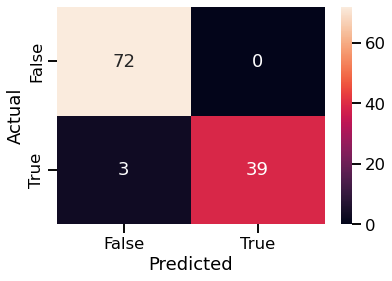

In [57]:
# Take a look at the confusion matrix on the test set prediction results
cm_gr_svc_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_gr_svc_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.97      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



## Using RandomizedSearchCV 

In [59]:
from sklearn.model_selection import RandomizedSearchCV 

# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    svc_clf = svm.SVC(random_state=1)
    
    #need to figure out hyperparameters for a model
    param_grid = {
        #key must match hyperparameter names of model
        'kernel': ('linear', 'poly', 'rbf'),
        'C': [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10]}

    rs_svc_clf = RandomizedSearchCV(svc_clf, param_grid, n_jobs = -1, scoring = 'roc_auc')
    
    rs_svc_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(rs_svc_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9889774682649579

k-folds=3
0.9920019346612143

k-folds=4
0.9931788188216291

k-folds=5
0.9938080495356036

k-folds=6
0.9944210075813157

k-folds=7
0.9902938443670151

k-folds=8
0.9937469937469937

k-folds=9
0.9940223542727787

k-folds=10
0.9951898000579543



In [60]:
svc_clf = svm.SVC(random_state=1)

param_grid = {
    #key must match hyperparameter names of model
    'kernel': ('linear', 'poly', 'rbf'),
    'C': [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10]}

rs_svc_clf = RandomizedSearchCV(svc_clf, param_grid, n_jobs = -1, scoring = 'roc_auc')

rs_svc_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(rs_svc_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with random_SVC = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with random_SVC = 0.9941611127209503


In [61]:
rs_svc_clf.best_params_

{'kernel': 'rbf', 'C': 8}

In [62]:
rs_svc_clf.best_score_

0.9949432404540766

In [63]:
# The error on the training and test data sets
y_train_pred = rs_svc_clf.predict(X_train)
y_test_pred = rs_svc_clf.predict(X_test)

train_test_full_error_rs_svc_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_rs_svc_clf

,train,test
accuracy,0.989011,0.973684
precision,1.000000,1.000000
recall,0.970588,0.928571
f1,0.985075,0.962963


In [64]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[72  0]
 [ 3 39]]


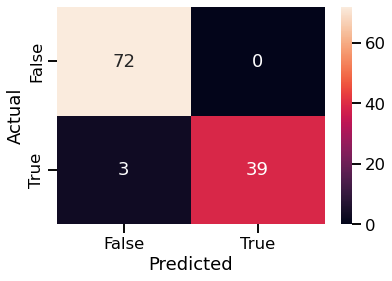

In [65]:
# Take a look at the confusion matrix on the test set prediction results
cm_rs_svc_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_rs_svc_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [66]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.97      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



# 4. Naive Bayes Classifier Model

### BernoulliNB

Create a BernoulliNB classifier Model <br> 

In [67]:
from sklearn.naive_bayes import BernoulliNB

# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    BerNB_clf = BernoulliNB()
    
    BerNB_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(BerNB_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9814016141273805

k-folds=3
0.9805456624016179

k-folds=4
0.9806719841009883

k-folds=5
0.9819401444788441

k-folds=6
0.9817076011133238

k-folds=7
0.9822915214866433

k-folds=8
0.9817520442520442

k-folds=9
0.9810914214299188

k-folds=10
0.9827368878585918



In [68]:
BerNB_clf = BernoulliNB()

BerNB_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(BerNB_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with BernoulliNB = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with BernoulliNB = 0.9827368878585918


In [69]:
# The error on the training and test data sets
y_train_pred = BerNB_clf.predict(X_train)
y_test_pred = BerNB_clf.predict(X_test)

train_test_full_error_BerNB_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_BerNB_clf

,train,test
accuracy,0.936264,0.929825
precision,0.902857,0.925000
recall,0.929412,0.880952
f1,0.915942,0.902439


In [70]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[69  3]
 [ 5 37]]


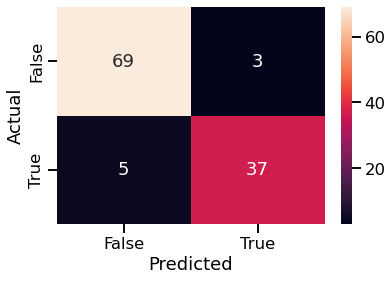

In [71]:
# Take a look at the confusion matrix on the test set prediction results
cm_BerNB_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_BerNB_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [72]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       285
           1       0.90      0.93      0.92       170

    accuracy                           0.94       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455



### GaussianNB

Create a GaussianNB classifier Model <br>

In [73]:
from sklearn.naive_bayes import GaussianNB

# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    GauNB_clf = GaussianNB()
    
    GauNB_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(GauNB_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9864288155920302

k-folds=3
0.9827991030207096

k-folds=4
0.9783274095477257

k-folds=5
0.981217750257998

k-folds=6
0.9786635383549361

k-folds=7
0.9828281068524971

k-folds=8
0.9832427162784305

k-folds=9
0.9861615470875515

k-folds=10
0.9849971022891916



In [74]:
GauNB_clf = GaussianNB()

GauNB_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(GauNB_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with GaussianNB = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with GaussianNB = 0.9864288155920302


In [75]:
# The error on the training and test data sets
y_train_pred = GauNB_clf.predict(X_train)
y_test_pred = GauNB_clf.predict(X_test)

train_test_full_error_GauNB_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_GauNB_clf

,train,test
accuracy,0.945055,0.921053
precision,0.944785,0.923077
recall,0.905882,0.857143
f1,0.924925,0.888889


In [76]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[69  3]
 [ 6 36]]


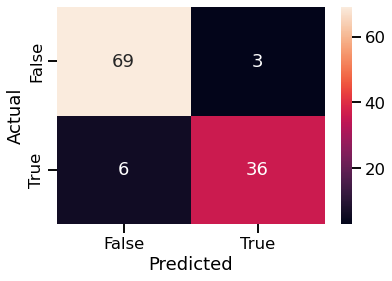

In [77]:
# Take a look at the confusion matrix on the test set prediction results
cm_GauNB_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_GauNB_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [78]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       285
           1       0.94      0.91      0.92       170

    accuracy                           0.95       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.95      0.95      0.94       455



# 5. Logistic Regression Classifier Model

Create a Logistic Regression classifier Model <br> 

In [79]:
from sklearn.linear_model import LogisticRegression

# sensitivity analysis of k in k-fold cross-validation

# evaluate the model using a given test condition
def evaluate_model(cv):
    logR_clf = LogisticRegression(random_state=36, C = 1.0, solver='lbfgs', max_iter=10000)
    
    logR_clf.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(logR_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

# define folds to test
folds = range(2,11)

# record each set of results
k_fold_list = list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
    # evaluate k value
    k_mean = evaluate_model(cv)
    # report performance
    print('k-folds=%d' % (k))
    print(k_mean)
    print()
    # store each mean roc_auc into the list
    k_fold_list.append(k_mean)

k-folds=2
0.9935556572673392

k-folds=3
0.9941674361341951

k-folds=4
0.9931178912406393

k-folds=5
0.9950464396284829

k-folds=6
0.9953049849188881

k-folds=7
0.996096399535424

k-folds=8
0.9950607263107263

k-folds=9
0.9955373986040369

k-folds=10
0.9956099681251811



In [80]:
logR_clf = LogisticRegression(random_state=36, C = 1.0, solver='lbfgs', max_iter=10000)

logR_clf.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
scores = cross_validate(logR_clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with LogR = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with LogR = 0.996096399535424


In [81]:
# The error on the training and test data sets
y_train_pred = logR_clf.predict(X_train)
y_test_pred = logR_clf.predict(X_test)

train_test_full_error_logR_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_logR_clf

,train,test
accuracy,0.986813,0.964912
precision,1.000000,0.975000
recall,0.964706,0.928571
f1,0.982036,0.951220


In [82]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[71  1]
 [ 3 39]]


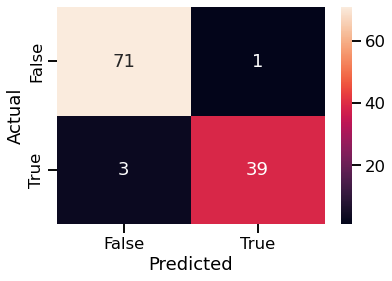

In [83]:
# Take a look at the confusion matrix on the test set prediction results
cm_logR_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_logR_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [84]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.96      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



# 1. VotingClassifier Ensemble (Hard)

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = [('logreg', logR_clf),('knn', gr_knn_clf), ('dt', gr_dt_bal_clf), ('svc', gr_svc_clf), ('NB', BerNB_clf)], voting ='hard')

vot_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(max_iter=10000,
                                                 random_state=36)),
                             ('knn',
                              GridSearchCV(estimator=KNeighborsClassifier(),
                                           n_jobs=-1,
                                           param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                                           scoring='roc_auc')),
                             ('...
                              GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                            random_state=42),
                                           n_jobs=-1,
                                           param_grid={'max_depth': range(1, 8, 2),
                                                       'max_features': range(1, 31)},
                                           scoring='roc_auc')),
                             ('svc',
                              GridSearchCV(estimator=SVC(random_state=1),
                                           n_jobs=-1,
                                           param_grid={'C': [0.01, 0.1, 0.5, 1,
                                                             2, 4, 6, 8, 10],
                                                       'kernel': ('linear',
                                                                  'poly',
                                                                  'rbf')},
                                           scoring='roc_auc')),
                             ('NB', BernoulliNB())])

In [87]:
# The error on the training and test data sets
y_train_pred = vot_hard.predict(X_train)
y_test_pred = vot_hard.predict(X_test)

train_test_full_error_vot_hard = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_vot_hard

,train,test
accuracy,0.984615,0.973684
precision,1.000000,1.000000
recall,0.958824,0.928571
f1,0.978979,0.962963


In [88]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[72  0]
 [ 3 39]]


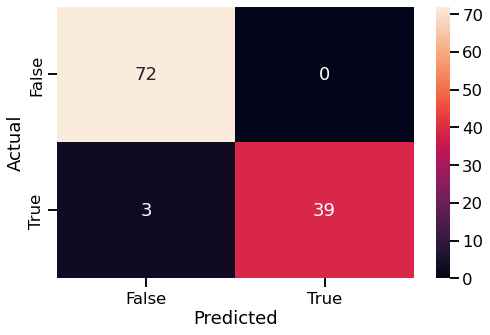

In [89]:
plt.figure(figsize=(8,5))

# Take a look at the confusion matrix on the test set prediction results
cm_vot_hard = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_vot_hard, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [90]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



# 2. VotingClassifier Ensemble (Soft)

In [91]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = [('logreg',logR_clf),('knn', gr_knn_clf), ('dt', gr_dt_bal_clf), ('svc', gr_svc_clf), ('NB', BerNB_clf)], voting ='soft')

vot_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(max_iter=10000,
                                                 random_state=36)),
                             ('knn',
                              GridSearchCV(estimator=KNeighborsClassifier(),
                                           n_jobs=-1,
                                           param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                                           scoring='roc_auc')),
                             ('...
                              GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                            random_state=42),
                                           n_jobs=-1,
                                           param_grid={'max_depth': range(1, 8, 2),
                                                       'max_features': range(1, 31)},
                                           scoring='roc_auc')),
                             ('svc',
                              GridSearchCV(estimator=SVC(random_state=1),
                                           n_jobs=-1,
                                           param_grid={'C': [0.01, 0.1, 0.5, 1,
                                                             2, 4, 6, 8, 10],
                                                       'kernel': ('linear',
                                                                  'poly',
                                                                  'rbf')},
                                           scoring='roc_auc')),
                             ('NB', BernoulliNB())],
                 voting='soft')

In [92]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[72  0]
 [ 3 39]]


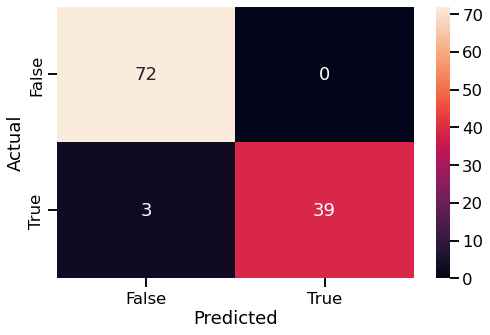

In [93]:
plt.figure(figsize=(8,5))

# Take a look at the confusion matrix on the test set prediction results
cm_vot_soft = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_vot_soft, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [94]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



# 3. Stacking Classifier Ensemble

In [95]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(
 estimators = [('knn', gr_knn_clf), ('dt', gr_dt_bal_clf), ('svc', gr_svc_clf), ('NB', BerNB_clf)], final_estimator = logR_clf)

In [96]:
stack_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                GridSearchCV(estimator=KNeighborsClassifier(),
                                             n_jobs=-1,
                                             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                                             scoring='roc_auc')),
                               ('dt',
                                GridSearchCV(estimator=DecisionTreeClassifier(class_weig...
                                                                              random_state=42),
                                             n_jobs=-1,
                                             param_grid={'max_depth': range(1, 8, 2),
                                                         'max_features': range(1, 31)},
                                             scoring='roc_auc')),
                               ('svc',
                                GridSearchCV(estimator=SVC(random_state=1),
                                             n_jobs=-1,
                                             param_grid={'C': [0.01, 0.1, 0.5,
                                                               1, 2, 4, 6, 8,
                                                               10],
                                                         'kernel': ('linear',
                                                                    'poly',
                                                                    'rbf')},
                                             scoring='roc_auc')),
                               ('NB', BernoulliNB())],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      random_state=36))

In [97]:
# The error on the training and test data sets
y_train_pred = stack_clf.predict(X_train)
y_test_pred = stack_clf.predict(X_test)

train_test_full_error_stack_clf = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error_stack_clf

,train,test
accuracy,0.991209,0.991228
precision,1.000000,1.000000
recall,0.976471,0.976190
f1,0.988095,0.987952


In [98]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cnf_matrix)

[[72  0]
 [ 1 41]]


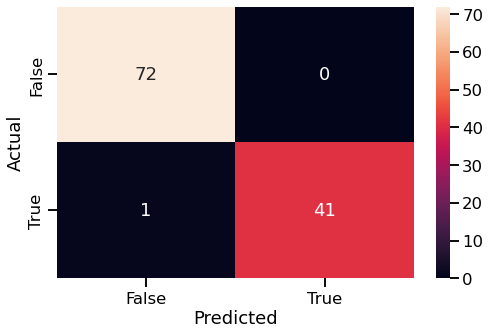

In [99]:
plt.figure(figsize=(8,5))

# Take a look at the confusion matrix on the test set prediction results
cm_stack_clf = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm_stack_clf, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [100]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       285
           1       1.00      0.98      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



### Performance Measurements (All models)

In [101]:
print('k-NN Classification')
print(train_test_full_error_gr_knn_clf)
print()
print('Decision Tree Classification')
print(train_test_error_gr_dt_bal_clf)
print()
print('SVM Classification')
print(train_test_full_error_gr_svc_clf)
print()
print('Naive Bayes Classification')
print(train_test_full_error_BerNB_clf)
print()
print('Logistic Regression Classification')
print(train_test_full_error_logR_clf)
print()
print('Voting Ensemble (Hard) Classification')
print(train_test_full_error_vot_hard)
print()
print('Stacking Ensemble Classification')
print(train_test_full_error_stack_clf)

k-NN Classification
              train      test
accuracy   0.953846  0.947368
precision  1.000000  1.000000
recall     0.876471  0.857143
f1         0.934169  0.923077

Decision Tree Classification
              train      test
accuracy   0.958242  0.903509
precision  0.931429  0.878049
recall     0.958824  0.857143
f1         0.944928  0.867470

SVM Classification
              train      test
accuracy   0.989011  0.973684
precision  1.000000  1.000000
recall     0.970588  0.928571
f1         0.985075  0.962963

Naive Bayes Classification
              train      test
accuracy   0.936264  0.929825
precision  0.902857  0.925000
recall     0.929412  0.880952
f1         0.915942  0.902439

Logistic Regression Classification
              train      test
accuracy   0.986813  0.964912
precision  1.000000  0.975000
recall     0.964706  0.928571
f1         0.982036  0.951220

Voting Ensemble (Hard) Classification
              train      test
accuracy   0.984615  0.973684
precision  1.0000

### Confusion Matrix (All models)

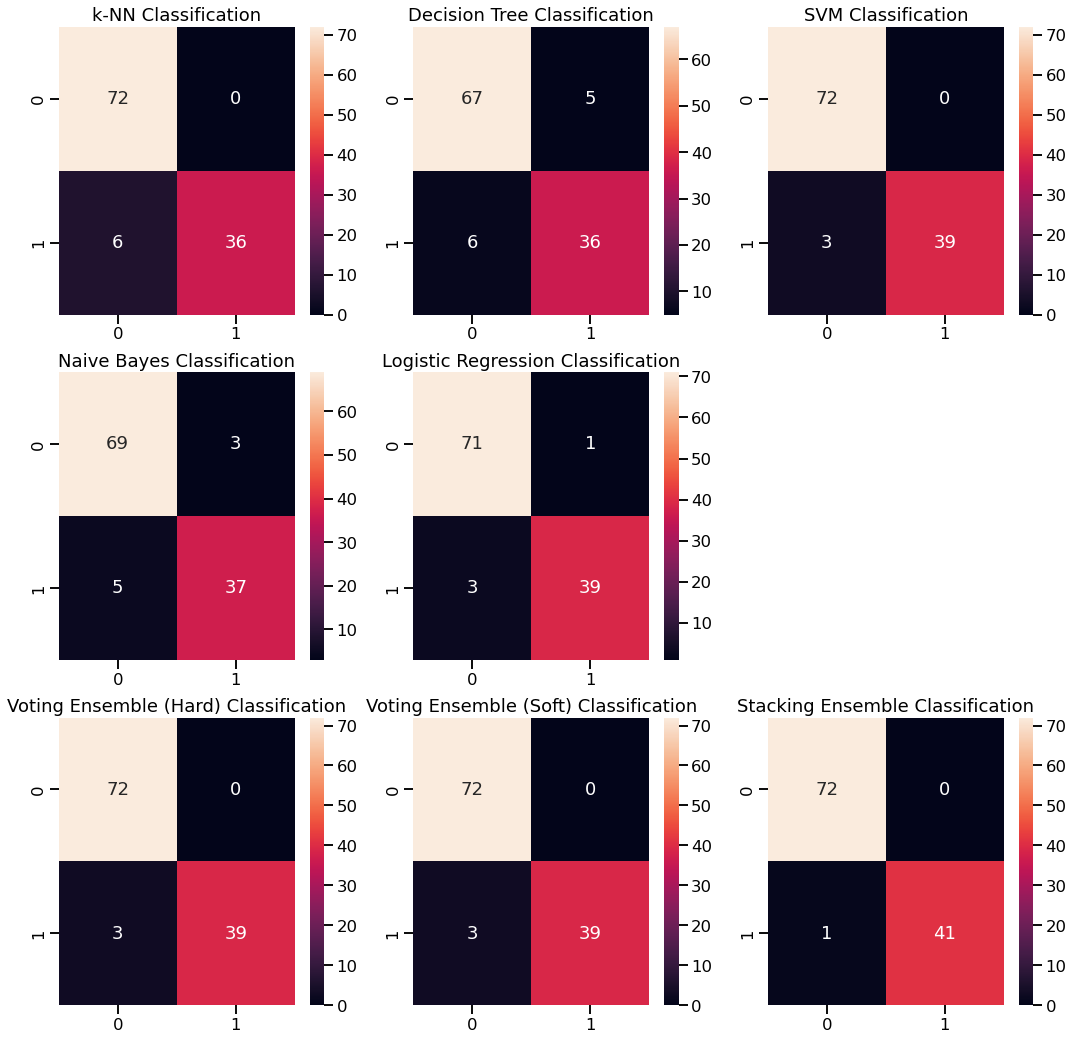

In [102]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('k-NN Classification')
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('Decision Tree Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Logistic Regression Classification')
ax7 = fig.add_subplot(3, 3, 7)
ax7.set_title('Voting Ensemble (Hard) Classification')
ax8 = fig.add_subplot(3, 3, 8)
ax8.set_title('Voting Ensemble (Soft) Classification')
ax9 = fig.add_subplot(3, 3, 9)
ax9.set_title('Stacking Ensemble Classification')
sns.heatmap(data=cm_gr_knn_clf, annot=True, fmt='d', ax=ax1)  
sns.heatmap(data=cm_gr_dt_bal_clf, annot=True, fmt='d', ax=ax2)
sns.heatmap(data=cm_gr_svc_clf, annot=True, fmt='d', ax=ax3)
sns.heatmap(data=cm_BerNB_clf, annot=True, fmt='d', ax=ax4)  
sns.heatmap(data=cm_logR_clf, annot=True, fmt='d', ax=ax5)
sns.heatmap(data=cm_vot_hard, annot=True, fmt='d', ax=ax7)
sns.heatmap(data=cm_vot_soft, annot=True, fmt='d', ax=ax8)
sns.heatmap(data=cm_stack_clf, annot=True, fmt='d', ax=ax9)
plt.show()

## Summary of results
1. After optimization of all models, the best performing Classifier that give the lowest False Positives and False Negatives is Support Vector Machine (SVC). It has the highest F1 score of 0.962963 amongst all base estimator models 

2. After performing Voting (Hard and Soft) Classifier Ensemble by grouping these individual base  estimators together, the F1 score is 0.962963 (same as SVM)

3. On the other hand, when Stacking Classifier Ensemble is performed by grouping these individual base estimators together, the F1 score is 0.987952

Taken together, these results demonstrated that Stacking Classifier Ensemble performs the best amongst all models, with the highest F1 score (lowest False Positives and False Negatives) achieved. This analysis demonstrated the effectiveness of using both Voting and Stacking Ensemble methods in building the most optimised model that gives the best performance measures.

## End of Notebook